In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df=pd.read_csv(r"D:\project\2 new projects\crop recommendation system\Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


for each feature we can see what is min value and max value we can also see count, mean , std etc.

In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df.shape

(2200, 8)

here we can see there are 2200 no of rows and 8 columns

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

here we can see there are no any null values in our given dataset

In [9]:
X=df.drop('label', axis=1)
y=df['label']

In [10]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [11]:
crop_summery=pd.pivot_table(df, index=['label'],aggfunc='mean')

In [12]:
crop_summery

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


Text(0.5, 1.0, 'label v/s ph')

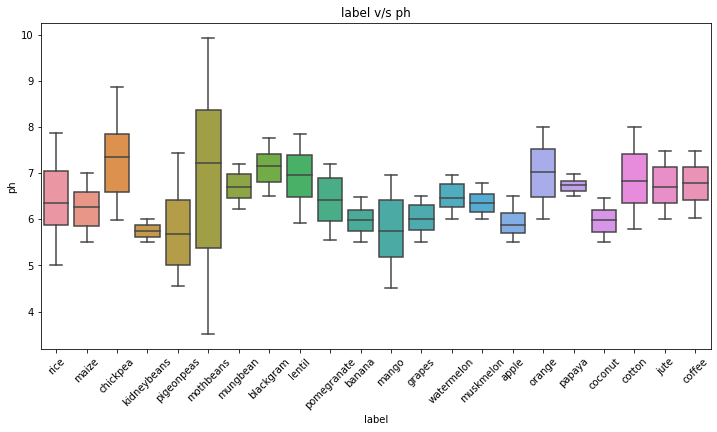

In [13]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='label', y='ph', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('label v/s ph')

<AxesSubplot:ylabel='N'>

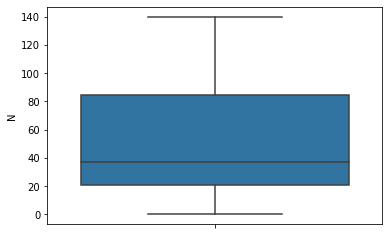

In [14]:
sns.boxplot(data=df,y="N")

<AxesSubplot:ylabel='P'>

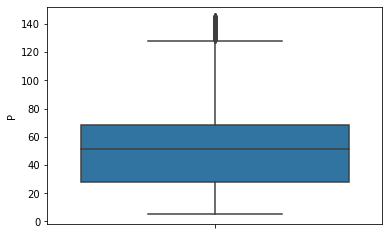

In [15]:
sns.boxplot(data=df,y="P")

<AxesSubplot:ylabel='K'>

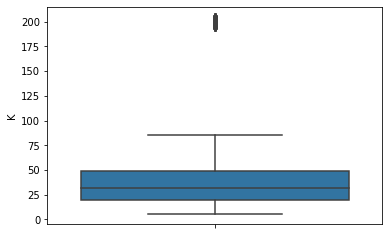

In [16]:
sns.boxplot(data=df,y="K")

here we can see the boxplots of N,P,K  whose min values max values and the present outliers 
#outliers is the data which is present outside of given range

Text(0.5, 1.0, 'label v/s temperature')

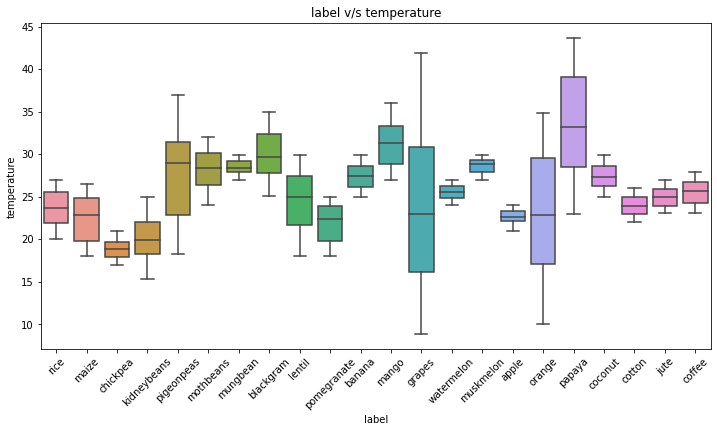

In [17]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='label', y='temperature', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('label v/s temperature')

Text(0.5, 1.0, 'outliers graph')

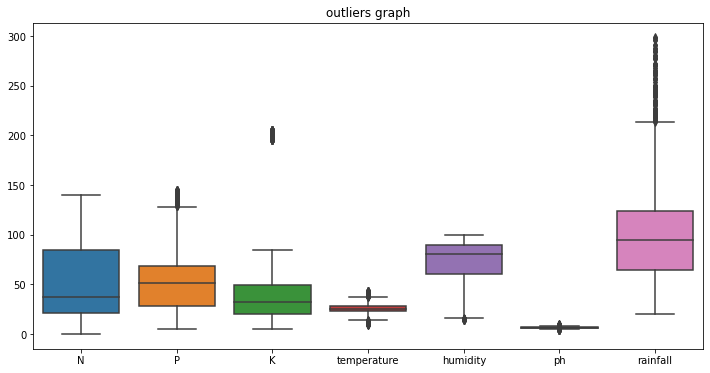

In [18]:
plt.figure(figsize = (12, 6))
sns.boxplot(data=df[:])
plt.title('outliers graph')

<Figure size 1008x648 with 0 Axes>

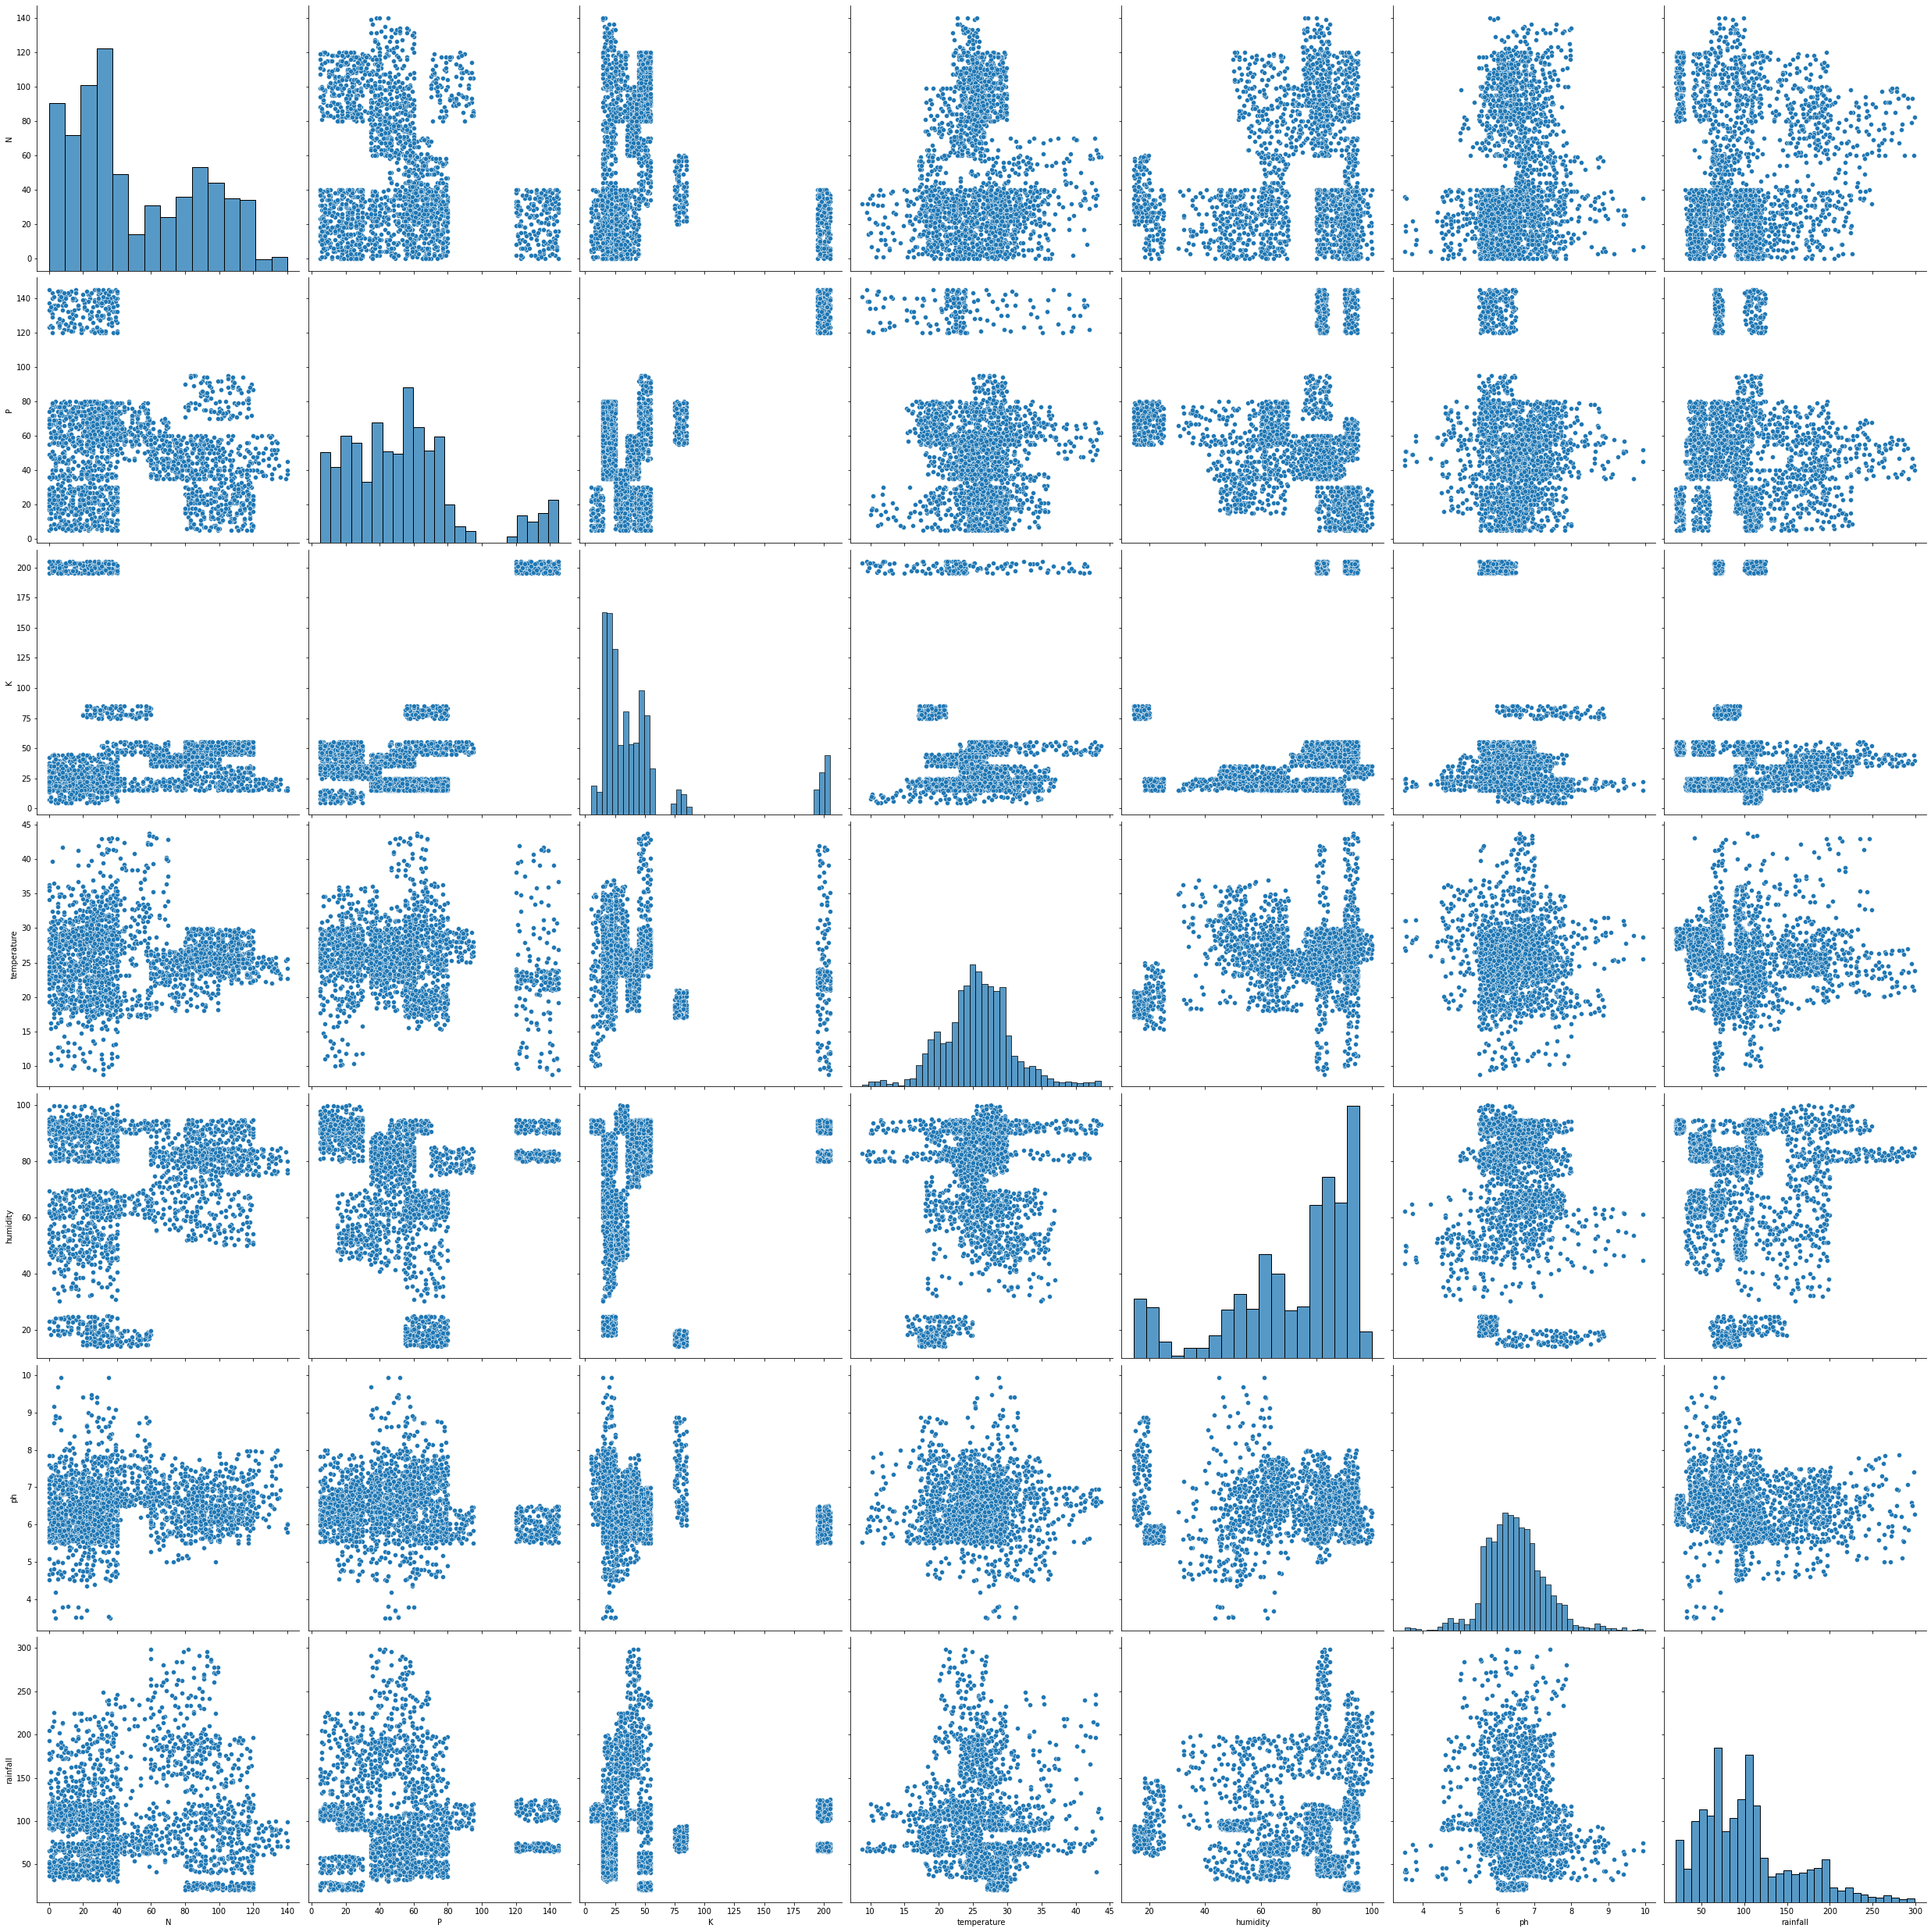

In [19]:
plt.figure(figsize=(14,9))
sns.pairplot(df,height=5)

in the above pairplot typically displays scatter plots between all possible pairs of variables in dataset. the digonal of the pairplot usually shows the distribution of each variable. the scatter plot on lower tringle of the pairplot show the relationship between two varible while the upper triangle shows the same realtionship but with the axes reversed.

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [21]:
#initialize label encoder
le=LabelEncoder()

In [22]:
labels=df['label']

In [23]:
le.fit(labels)

LabelEncoder()

In [24]:
encoded_labels=le.transform(df['label'])

In [25]:
decoded_labels=le.inverse_transform(encoded_labels)

In [26]:
print(encoded_labels)
print(decoded_labels)

[20 20 20 ...  5  5  5]
['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']


here we can see for rice label encoder encodes it to 20 and for coffee it is 5. likewiese for other too.

In [27]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [28]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


it is interrelation between all variable whether it is inversly propertional or directly propertional.

<AxesSubplot:>

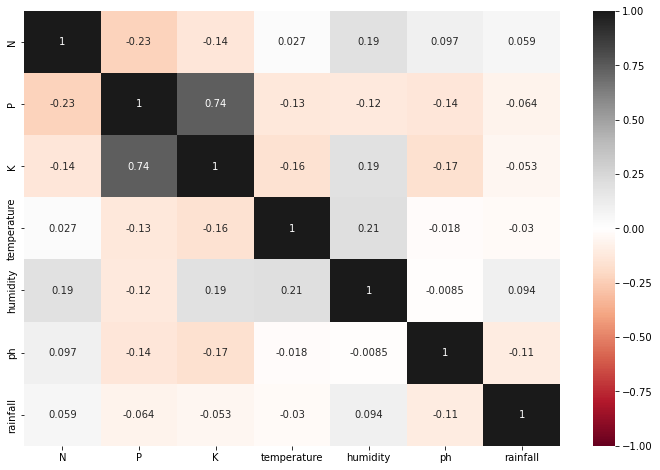

In [29]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,vmax=1.0, vmin=-1.0, cmap='RdGy', annot=True)

s we can anlyse max value is 1 and min value is -1 so which parameter is contributing and affecting the label. for ex-
here we can see for what values of ph ranges between -1 to 1 values of N, P, K temperature and humidity .


In [30]:
X = df[['N','P','K','temperature','humidity','ph','rainfall']]
y = df[['label']]

In [31]:
# standardization of data
from sklearn.preprocessing import StandardScaler

In [32]:
# initialize standerdscaler
scaler=StandardScaler()

In [33]:

scaler_fit=scaler.fit(X)

In [34]:
# generate the standardize value of x and y
X=scaler_fit.transform(X)

In [35]:
X

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [36]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=40)

In [37]:
X_train.shape

(1540, 7)

In [38]:
X_test.shape

(660, 7)

In [39]:
y_train.shape

(1540, 1)

In [40]:
y_test.shape

(660, 1)

# model building

# SVM (Support vector machine) classifier

In [41]:
from sklearn.svm import SVC

In [42]:
# if the data is not linerarly seperable, the SVM use a kernal function to map the data into a higher-dimentional
#space where the classes are seperable. some common kernal function include linear, polynomiall and radial basis function.
model=SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [43]:
svm_pred=model.predict(X_test)

In [44]:
print(svm_pred)

['blackgram' 'papaya' 'coffee' 'grapes' 'mango' 'kidneybeans'
 'pomegranate' 'orange' 'maize' 'mungbean' 'orange' 'coffee' 'coconut'
 'banana' 'pigeonpeas' 'orange' 'cotton' 'pomegranate' 'muskmelon'
 'papaya' 'pomegranate' 'banana' 'papaya' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'cotton' 'maize' 'kidneybeans' 'mungbean' 'coconut'
 'mango' 'coffee' 'blackgram' 'blackgram' 'jute' 'mothbeans' 'orange'
 'orange' 'jute' 'watermelon' 'mothbeans' 'coffee' 'jute' 'lentil' 'jute'
 'jute' 'pigeonpeas' 'cotton' 'jute' 'apple' 'mungbean' 'muskmelon'
 'mungbean' 'grapes' 'mango' 'chickpea' 'mango' 'grapes' 'kidneybeans'
 'pigeonpeas' 'rice' 'papaya' 'mungbean' 'papaya' 'orange' 'grapes'
 'apple' 'watermelon' 'pomegranate' 'pomegranate' 'papaya' 'papaya'
 'lentil' 'chickpea' 'mungbean' 'banana' 'muskmelon' 'kidneybeans'
 'coffee' 'watermelon' 'grapes' 'apple' 'cotton' 'apple' 'jute' 'grapes'
 'lentil' 'mango' 'coffee' 'coffee' 'banana' 'lentil' 'jute' 'apple'
 'watermelon' 'mango' 'coconut' 'm

In [45]:
# model accuracy for X_test  
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

98.33333333333333 %


In [46]:
# creating confusion matrix


In [47]:
cm=confusion_matrix(y_test,svm_pred)
print(cm)
print()
print("clssification report\n")
print( classification_report(y_test,svm_pred))

[[32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

# KNN (k-nearest neighbors) classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# knn=KNeighbhorsClassifier(n_neighbors=42)
knn = KNeighborsClassifier(n_neighbors = 42)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

In [50]:
# accuracy on x_test
accuracy=knn.score(X_test, y_test)
print(accuracy*100,'%')

91.96969696969697 %


In [51]:
# creating confusion matrix with the help of the following script we can make predictions--
knn_prediction=knn.predict(X_test)

#next print result as follows

print(classification_report(knn_prediction,y_test))

cm=confusion_matrix(y_test, knn_prediction)
print(cm)

              precision    recall  f1-score   support

       apple       1.00      0.89      0.94        36
      banana       1.00      1.00      1.00        30
   blackgram       0.96      0.69      0.81        36
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.97      0.98        32
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       0.86      1.00      0.93        25
        jute       1.00      0.76      0.86        41
 kidneybeans       1.00      0.91      0.95        32
      lentil       0.88      0.81      0.85        27
       maize       1.00      1.00      1.00        30
       mango       0.97      0.89      0.93        44
   mothbeans       0.63      0.89      0.74        19
    mungbean       1.00      0.85      0.92        40
   muskmelon       1.00      1.00      1.00        36
      orange       0.81      1.00      0.89        25
      papaya       0.72    

# naive bays classifier

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)


In [54]:
# accuracy on x_test

In [55]:
accuracy=gnb.score(X_test, y_test)
print(accuracy*100,'%')
print()
print(classification_report(y_test,gnb_predictions))

99.39393939393939 %

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.89      1.00      0.94        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      1.00      1.00        31
      

In [56]:
cm=confusion_matrix(y_test, gnb_predictions)
print(cm)

[[32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

#  Decision Tree classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state=50)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=50)

In [58]:
#predicting the test set result
y_pred=classifier.predict(X_test)

In [59]:
y_pred

array(['blackgram', 'papaya', 'coffee', 'grapes', 'mango', 'kidneybeans',
       'pomegranate', 'orange', 'maize', 'mungbean', 'orange', 'coffee',
       'coconut', 'banana', 'pigeonpeas', 'orange', 'cotton',
       'pomegranate', 'muskmelon', 'papaya', 'pomegranate', 'banana',
       'papaya', 'pomegranate', 'maize', 'mothbeans', 'cotton', 'cotton',
       'maize', 'kidneybeans', 'mungbean', 'coconut', 'mango', 'coffee',
       'blackgram', 'blackgram', 'jute', 'blackgram', 'orange', 'orange',
       'jute', 'watermelon', 'mothbeans', 'coffee', 'jute', 'lentil',
       'rice', 'jute', 'pigeonpeas', 'cotton', 'jute', 'apple',
       'mungbean', 'muskmelon', 'mungbean', 'grapes', 'mango', 'chickpea',
       'mango', 'grapes', 'kidneybeans', 'pigeonpeas', 'rice', 'papaya',
       'mungbean', 'papaya', 'orange', 'grapes', 'apple', 'watermelon',
       'pomegranate', 'pomegranate', 'papaya', 'papaya', 'lentil',
       'chickpea', 'mungbean', 'banana', 'muskmelon', 'kidneybeans',
       'co

In [62]:
# making the confusion matrix, classification repot,accuracy


cm=confusion_matrix(y_test,y_pred)
print(cm)

acc=accuracy_score(y_test,y_pred)

print(acc*100,"%")
print(classification_report(y_test,y_pred))

[[32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0